# Week 1 Notes - Getting and Cleaning Data 
The course uses R as the programming language, however, I would prefer to learn Julia even more deeply, and so I will be writing down the commands in R, alongside the commands in Julia, which will be executed and used to complete this course. 

## Downloading Files

### Changing working directories
To print the working directory in **R** we use the `getwd()` function, and to change the working directory we use the `setwd("/././")` function, which can be both an absolute or relative path. 

In **Julia** we use `pwd()` to print the working directory, and `cd("/./.")` to change the working directory, so exactly as is done in linux. 

### Checking if directories and files are present, and creating directories
In **R** we would (counterintuitively) use the `file.exist()` function (a directory is clearly not a file in the common sense) to check if a directory exists, and then the `dir.create("arg")` function to create the directory. 

In **Julia** we can use the `isdir()` function to check if a directory exists, along with the `mkdir("arg")` function to make a directory. 

### Downloading files 
In **R** to download a file, perform `download.file(url, destfile, method)` - make sure to pay attention to the arguments.
After downloading a file we can verify the contents of the directory with `list.files("arg")` function.

In **Julia** we can use the `download(url, path)` - there are also many other arguments, so take a look at the documentation before using the function. There is also an additional package https://github.com/Arkoniak/UrlDownload.jl which provides a fancier alternative. As above we can check the presence of the file in the directory using the `readdir()` function 

### Storing the current date in a variable 
This may come in handy for replication - especially if the various components of the analysis are being performed across different days - I must admit this is not something that I had considered until now - great advice. 

In **R** we can store the date in a simply date variable as such `datedownloaded = date()` whereas in **Julia** it takes a few more steps, as we must use the Dates package, and then use the `Dates.now()` function. 

In [1]:
using Dates

In [2]:
dateDownloaded = Dates.now()

2024-01-22T15:13:22.578

### Reading Local Files

The most basic way to read table/matrix formatted data into **R** is the `read.table(args...)` function.

In **Julia**, we have the basic `read()` functionality `read(filename::AbstractString, args...)`, along with tailored read functions provided by packages such as CSV `using CSV ; CSV.read(args)`. Let's not forget the `open()` function can can be paired with `readlines()` and so on. 

In [3]:
using CSV

### Reading Excel Files

In **R** we'll be using the xlsx library, loaded as `library(xlsx)` which is a basic package for working with excel files. To read in the downloaded excel file, we can do `exceldata = read.xlsx(file, args...)`. The inverse function `write.xlsx()` will write excel files. 

**Julia** also has it's own package for excel file, aptly titled "XLSX". 

In [4]:
using Pkg ; Pkg.add("XLSX")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [5]:
using XLSX

Reading an excel file in Julia is done in it's most basic form as `XLSX.readxlsx("data')` or `XLSX.readdata("data", args...)` - the documentation will be the best place to start. The inverse function `XLSX.writexlsx("data)` will appropriately write excel data. 

### XML data
XML stands for "Extensible Markup Language" and it is a common data format for web usage. Like JSON, YAML, it stores *structured* data, and extracting components and features of the XML is the basis of alot of web scraping. 

As we've seen with the Excel and CSV files, there are typically dedicated packages/libraries for working with these data forms - in this case in **R** we need the `library(XML)` library. 

After we've got the library loaded, we can load an XML tree from a files url using a specific function `dox <- xmlTreeParse(url, useINTERNAL=TRUE, args...)` and inspect a specific aspect of the XML tree, the node, using `rootNode <- xmlRoot(doc)`.  

**Julia** has several packages for XML files, two popular ones being XML.jl and EzXML.jl - the latter being a more aged and popular package which also has handy HTML operations. 

In [6]:
Pkg.add("EzXML")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [3]:
using EzXML

The XML file being structured, has several basic building blocks, the first being the root of the structure, which contains everything in the XML. Attached to the root are children, which often have their own sub-children as attributes and tags.    
   
For example: 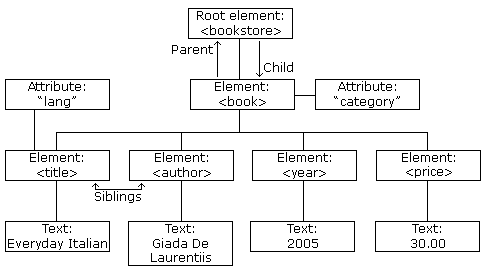

In **R**, if we've got the root stored in a variable, we can access the contents of the root in an indexed fashion `root[[1]]` and then the index of the child element as well `root[[1]][[1]]` - though this is quite ugly in my opinion!

A basic explanation of the use of XML in **Julia** is provided by a XML.jl snippet from github
```julia
using XML

filename = joinpath(dirname(pathof(XML)), "..", "test", "data", "books.xml")

doc = read(filename, Node)

children(doc)
# 2-Element Vector{Node}:
#  Node Declaration <?xml version="1.0"?>
#  Node Element <catalog> (12 children)

doc[end]  # The root node
# Node Element <catalog> (12 children)

doc[end][2]  # Second child of root
# Node Element <book id="bk102"> (6 children)
```

### Xpath language
The Xpath language is a dedicated language that is part of the XML ecosystem. It is said to provide a number of advantages compared to the use of raw XML and programming libraries/packages. Often the libraries for XML will allow one to use Xpath directly. Jeff Leek recommends this presentation as a nice intro https://www.stat.berkeley.edu/users/statcur/Workshop2/Presentations/XML.pdf 

Using Xpath with **R** - the key here is in the //li[@case='price'] 
```R
# Parse a html tree
htmlTree = htmlTreeParse(file, args...)
prices <- xPathSapply(htmlTree,"//li[@case='price']", xmlValue)
# Show all the extracted prices from the html tree!
prices
```

Using Xpath with **Julia** - notice that the query looks somewhat like a **sed** operation 
```julia
# Find texts using XPath query.
for species_name in nodecontent.(findall("//species/text()", primates))
    println("- ", species_name)
end
```

### Parsing and Working with JSON 
JSON is another extremely common data-metadata format which often stores volumous amounts of information in it's structure. 

**R** has a nice JSON library called `library(jsonlite)` which provides many basic functions. To read in some JSON data: `myJSON <- fromJSON("url")` and view the names of the JSON elements `names(myJSON)`

**Julia** has the JSON.jl https://github.com/JuliaIO/JSON.jl package: `JSON.parsefile(filename, args...)` and JSON3.jl https://github.com/quinnj/JSON3.jl which is the preference of DataFrames creator Bogumil: `JSON3.read(json_string)`
`JSON3.write(x)` and from file `json_string = read("my.json", String)` 


In **R** to write a JSON into a table we can do use the toJSON() function `JSframe <- fromJSON(iris, pretty=TRUE` and then write it back into a JSON using `backtoJS <- fromJSON(JSframe)`.    

### Data.table in R and DataFrames in Julia
Both of these packages/libraries are specifically oriented towards more efficient processing, manipulation and overalling handling of matrix-like dataframes. 

Subsetting, filtering, merging, reading and writing larger datasets, splitting, combining and so on are the various operations which are extensively documented in both cases. 

## Quiz

### 1.
The American Community Survey distributes downloadable data about United States communities. Download the 2006 microdata survey about housing for the state of Idaho using download.file() from here: 

https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2Fss06hid.csv

and load the data into R. The code book, describing the variable names is here:

https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2FPUMSDataDict06.pdf 

How many properties are worth $1,000,000 or more?



Download file

In [8]:
download("https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2Fss06hid.csv", "./quiz_1_1.csv") 

"./quiz_1_1.csv"

Load data into a DataFrame 

In [9]:
using DataFrames

In [ ]:
us_com_survery = CSV.read("quiz_1_1.csv", DataFrame) 

In [ ]:
us_com_survery.VAL

In [ ]:
q = filter(n -> n == 24, skipmissing(us_com_survery.VAL))  

In [13]:
length(q)

53

In [14]:
Pkg.add("DataFramesMeta")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [15]:
using DataFramesMeta

In [ ]:
# Try filtering it in a different way 
#filter(:VAL == 24, skipmissing(us_com_survery))
subset(skipmissing(us_com_survery), :VAL => ByRow(x -> x == 24))

In [ ]:
# Using the DataFramesMeta macro - this will print the entire DataFrame as well
@rsubset us_com_survery :VAL == 24

## 3.
Download the Excel spreadsheet on Natural Gas Aquisition Program here:  
https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2FDATA.gov_NGAP.xlsx

In [18]:
download("https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2FDATA.gov_NGAP.xlsx", "gas_spreadsheet.xlsx")

"gas_spreadsheet.xlsx"

In [19]:
gas_excel = XLSX.readxlsx("gas_spreadsheet.xlsx")

XLSXFile("gas_spreadsheet.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
     NGAP Sample Data 95x26         A1:Z95       


In [20]:
XLSX.sheetnames(gas_excel)

1-element Vector{String}:
 "NGAP Sample Data"

Read rows 18-23 and columns 7-15 into R and assign the result to a variable called: dat

In [21]:
# Store the first sheet in a variable that we can access 
sheet =  gas_excel["NGAP Sample Data"]

95×26 XLSX.Worksheet: ["NGAP Sample Data"](A1:Z95) 

In [22]:
row_matrix = XLSX.getdata(sheet, 18:23, 7:15)

6×9 Matrix{Any}:
      "Zip"   "CuCurrent"  …  "Fax"           "email"   "Status"
 74136       0                "918-491-6659"  missing  1
 30329       1                missing         missing  1
 74136       1                "918-523-2522"  missing  1
 80203       0                missing         missing  1
 80120       1             …  missing         missing  1

In [23]:
row_matrix[2:end, 1:end]

5×9 Matrix{Any}:
 74136  0  1  0  "918-491-6998"    0         "918-491-6659"  missing  1
 30329  1  0  0  "404-321-5711"     missing  missing         missing  1
 74136  1  0  0  "918-523-2516"    0         "918-523-2522"  missing  1
 80203  0  1  0  "303-864-1919"    0         missing         missing  1
 80120  1  0  0  "345-098-8890"  456         missing         missing  1

In [25]:
# This function turns a matrix into a dataframe, using the header/first row as the column titles. 
# Dataframes expects the form DataFrame(row contents, column names) as a basic elemental
function MatrixToDataFrame(mat)
    DF_mat = DataFrame(
        mat[2:end, 1:end], # rows
        string.(mat[1, 1:end]) # columns 
    )
    return DF_mat
end

MatrixToDataFrame (generic function with 1 method)

In [26]:
row_dataframe = MatrixToDataFrame(row_matrix)

Row,Zip,CuCurrent,PaCurrent,PoCurrent,Contact,Ext,Fax,email,Status
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,74136,0,1,0,918-491-6998,0,918-491-6659,missing,1
2,30329,1,0,0,404-321-5711,missing,missing,missing,1
3,74136,1,0,0,918-523-2516,0,918-523-2522,missing,1
4,80203,0,1,0,303-864-1919,0,missing,missing,1
5,80120,1,0,0,345-098-8890,456,missing,missing,1


In [ ]:
# Read the rows 
df = DataFrame(XLSX.readtable("gas_spreadsheet.xlsx", "NGAP Sample Data", )

Translate this command into Julia and perform the calculation `sum(dat$Zip*dat$Ext,na.rm=T)` 

Created a smaller dataframe containing only the columns we're interested in - this is optional but has helped me understand the process. Since we're going to iterate across every column using broadcasting, we have to have the same length of each column, thus, we must drop rows containing missing values. 

In [28]:
min_frame = dropmissing(row_dataframe[!, [:Zip, :Ext]])

Row,Zip,Ext
,Any,Any
1,74136,0
2,74136,0
3,80203,0
4,80120,456


Now apply broadcasting to find the product of each column, and then calculate the sum of this iteration

In [29]:
sum(min_frame.Zip .* skipmissing(min_frame.Ext))

36534720

In [30]:
80120*456

36534720

## 4. 
Read the XML data on Baltimore restaurants from here:

https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2Frestaurants.xml 

How many restaurants have zipcode 21231?  

In [31]:
download("https://d396qusza40orc.cloudfront.net/getdata%2Fdata%2Frestaurants.xml", "rest_xml.xml") 

"rest_xml.xml"

In [4]:
rxml = readxml("rest_xml.xml")

EzXML.Document(EzXML.Node(<DOCUMENT_NODE@0x00000000028bd530>))

In [5]:
primates = root(rxml)

EzXML.Node(<ELEMENT_NODE[response]@0x00000000029db8c0>)

In [ ]:
for row in eachelement(primates)
    #row_id = row[" _id"]
    #prinln(- " row_id")
    for elements in eachelement(row)
        #el = nodecontent(elements)
        el = nodecontent(elements)
        println(el)
    end 
end 

In [73]:
# Xpath query 
function counter()
    tally = 0
for zipcode in nodecontent.(findall("//zipcode[text()=21231]", primates))
    #println("- ", zipcode)
    tally += 1 
    end 
tally
end

counter (generic function with 1 method)

In [74]:
counter()

127